# Breast Cancer Classification Project

In this project, we are developing a predictive model to classify breast cancer risk using the
Breast Cancer Coimbra Dataset. The goal is to apply Logistic Regression to predict whether
a patient is at risk of breast cancer based on physical and clinical attributes.


# Problem Statement

• Objective: To build a classification model using logistic regression that predicts whether
a patient is at risk of breast cancer.


• Target Variable: "Classification" (1 indicates the patient has breast cancer, 0 indicates the
patient does not).


# Dataset Overview

The dataset is the Breast Cancer Coimbra Dataset on Kaggle
Features:

• Age: Age of the patient.

• BMI: Body Mass Index.

• Glucose: Glucose level in blood.

• Insulin: Insulin level in blood.

• HOMA: Homeostasis Model Assessment.

• Leptin: Hormone involved in regulating energy balance.

• Adiponectin: Hormone involved in regulating glucose levels and fatty acid breakdown.

• Resistin: Hormone linked to obesity and insulin resistance.

• MCP-1: Monocyte Chemoattractant Protein-1.

# Load the Dataset and Initial Exploration

In [ ]:
# import necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn import metrics
import statsmodels.api as sm

In [ ]:
# mount drive and load dataset
from google.colab import drive
drive.mount("/content/drive")

cancer = pd.read_csv("/content/drive/MyDrive/Colab Notebooks 568/Data/dataR2.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# initial data exploration
# first 5 rows of data
cancer.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
# data types and usage
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [ ]:
# checking for missing values
# count how many missing values there are
cancer.isnull().sum()

,0
Age,0
BMI,0
Glucose,0
Insulin,0
HOMA,0
Leptin,0
Adiponectin,0
Resistin,0
MCP.1,0
Classification,0


A. There are no missing values in the dataset.

B. The summary statistics for each feature are shown below.

In [ ]:
# summary statistics
cancer.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


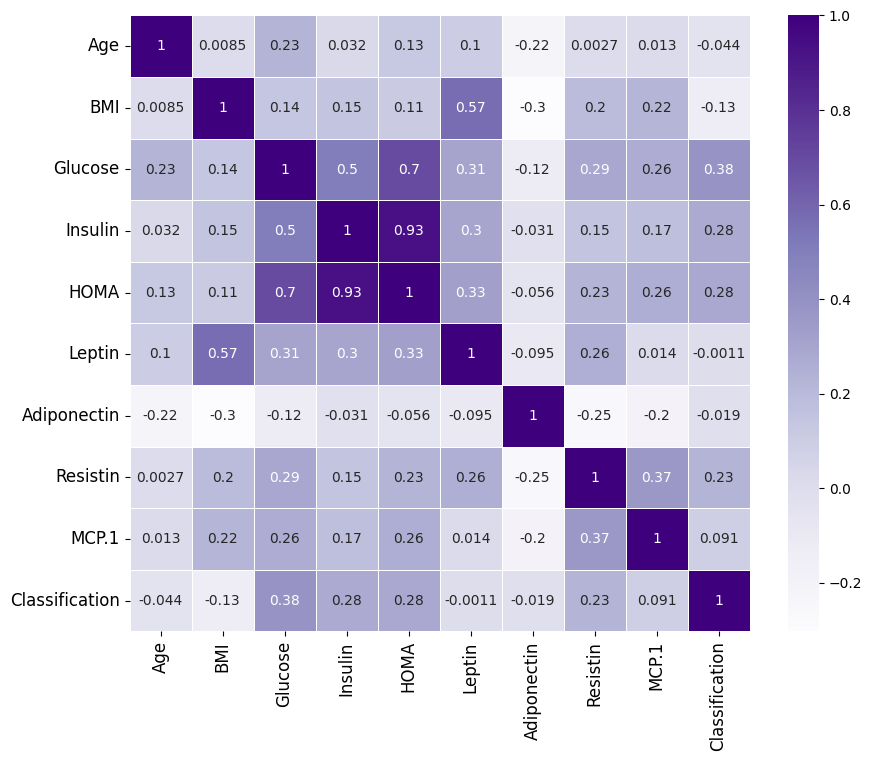

In [ ]:
# plotting a correlation matrix

plt.figure(figsize=(10, 8))

matrix = cancer.corr(numeric_only=True)
sns.heatmap(matrix, annot=True, cmap="Purples", linewidths=0.5, annot_kws={"size": 10})

# Add title and labels for clarity
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

C. One of the strongest correlations in the dataset is between Insulin and HOMA. Since HOMA measures insulin resistance, it makes sense for there to be a strong, positive relationship between the two. This indicates that as insulin levels increase, so does HOMA, and so does the risk of a patient being diagnosed with breast cancer.  

Another interesting relationship is between Age and BMI, which has a correlation of 0.0085. This indicates a very weak, positive relationship between these two variables. The correlation between the two is essentially negligible and shows that as a patient ages and BMI increases, there is no evidence to support that it increases a patient's risk level of being diagnosed with breast cancer.  

# Data Preprocessing

There are no missing values in the data, as seen above.

In [ ]:
# split the data into features and target
X = cancer.drop(columns=["Classification"])
y = cancer["Classification"]

In [ ]:
# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
test_size=0.2, random_state=42)

D. It is necessary to standardize the features before training the model to make sure all the variables are on the same scale. If they were not standardized, the model might focus more on numbers that are larger, even if they are not significant. Now that we have standardized the features, all of the will be contributing to the model's performance equally.

E. The proportion of data split between training and testing sets in the code above is 80% of the data goes to training and 20% goes to testing. This is a common choice because we need to give the model enough data to train it, or else its predictions will not be accurate. It allows the model to be better at generalizing, which will make its predictions more accurate when looking at new data. The 20% that is left is used to predict how accurate the model is and how well it performs. Splitting the data into 80/20 also helps to prevent overfitting, which would mean it only performs well on the training data it already knows, but does not perform well when interacting with new data.

# Building the Baseline Logistic Regression Model

In [ ]:
# build logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# make predictions on test set
y_pred = model.predict(X_test)


In [ ]:
# evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.92      0.88        12
           2       0.91      0.83      0.87        12

    accuracy                           0.88        24
   macro avg       0.88      0.88      0.87        24
weighted avg       0.88      0.88      0.87        24

[[11  1]
 [ 2 10]]


F. The accuracy of the model on the test set is 88%, according to the confusion matrix.

G. The confusion matrix and classification report (precision, recall, F1-score) are shown above.

In [ ]:
# get predicted probabilities for class 1 (the positive class)
y_prob = model.predict_proba(X_test)[:, 1]

# calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score * 100:.2f}%")


AUC Score: 94.44%


H. The AUC score of the model is 94.44%


# Model Improvement with Feature Engineering

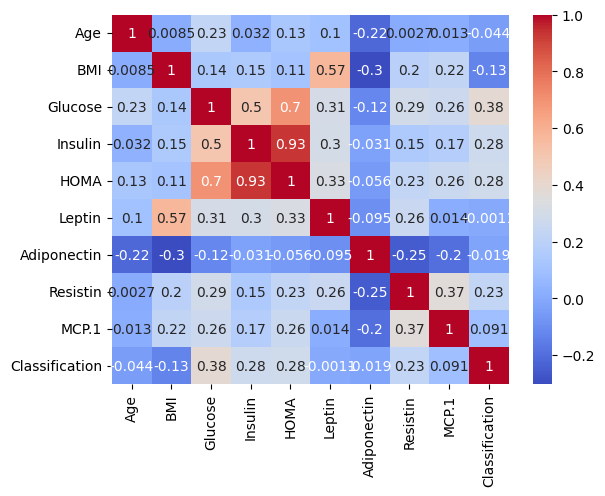

In [ ]:
# plot correlation heatmap
sns.heatmap(cancer.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
# drop irrelevant features based on correlation analysis and retrain model
X_reduced = cancer.drop(columns=["Insulin", "Adiponectin", "MCP.1",
"Classification"])
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
X_train_red = scaler.fit_transform(X_train_red)
X_test_red = scaler.transform(X_test_red)

In [ ]:
# rebuild logistic regression model
model_red = LogisticRegression()
model_red.fit(X_train_red, y_train_red)

LogisticRegression()

In [ ]:
# evaluate the reduced model
y_pred_red = model_red.predict(X_test_red)
print(classification_report(y_test_red, y_pred_red))

              precision    recall  f1-score   support

           1       0.79      0.92      0.85        12
           2       0.90      0.75      0.82        12

    accuracy                           0.83        24
   macro avg       0.84      0.83      0.83        24
weighted avg       0.84      0.83      0.83        24



I. The predictor variables we should drop from the model based on the instructions above are Insulin, Adiponectin, and MCP.1.  We should also drop Classification because that is our target variable.

J. The new model is slightly less accurate than the original model. It performs worse than the original model by 5%. The new model precision dropped from 85% to 79%, meaning that the level at which the new model can predict true positives has decreased, and now predicts more false positives.

# Model Improvement with Statsmodel

### Feature Significance Using Statsmodel

In [ ]:
# convert y_train to binary
# changes 1 and 2 to 0 and 1
y_train_binary = (y_train - 1)

# add constant for statsmodels
X_train_const = sm.add_constant(X_train)

# logistic regression with statsmodels
logit_model = sm.Logit(y_train_binary, X_train_const)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.518283
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         Classification   No. Observations:                   92
Model:                          Logit   Df Residuals:                       82
Method:                           MLE   Df Model:                            9
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                  0.2430
Time:                        19:16:56   Log-Likelihood:                -47.682
converged:                       True   LL-Null:                       -62.985
Covariance Type:            nonrobust   LLR p-value:                 0.0003459
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4884      0.347      1.406      0.160      -0.192       1.169
x1            -0.3827      0.

### Removing Insignificant Features and Rebuilding the Model

In [ ]:
# based on p-values from the statsmodels output, select significant features
# assume significant features are indices 0, 2, 4, etc.
# example indices
X_train_new = X_train[:, [0, 2, 4]]
X_test_new = X_test[:, [0, 2, 4]]

In [ ]:
# train logistic regression with selected features
logreg_new = LogisticRegression()
logreg_new.fit(X_train_new, y_train)

LogisticRegression()

In [ ]:
# predict with new features and evaluate
y_pred_new = logreg_new.predict(X_test_new)
accuracy_new = accuracy_score(y_test, y_pred_new)
print(f"New Model Accuracy: {accuracy_new * 100:.2f}%")

New Model Accuracy: 83.33%


K. Based on the p-values, the features that is statistically significant is x3, which is Glucose.

L. The new model has a lower accuracy score of 83% because we removed statistically insignifcant features. The new model is simpler because it has less variables. This helps to reduce overfitting.

# Regularization

### Apply L1 (Lasso) and L2 (Ridge) Regularization

In [ ]:
# L1 Regularization (Lasso)
logreg_l1 = LogisticRegression(penalty="l1", solver="liblinear")
logreg_l1.fit(X_train, y_train)
y_pred_l1 = logreg_l1.predict(X_test)
print(f"L1 Regularization Accuracy: {accuracy_score(y_test, y_pred_l1) * 100:.2f}%")

L1 Regularization Accuracy: 87.50%


In [ ]:
# L2 Regularization (Ridge)
logreg_l2 = LogisticRegression(penalty="l2")
logreg_l2.fit(X_train, y_train)
y_pred_l2 = logreg_l2.predict(X_test)
print(f"L2 Regularization Accuracy: {accuracy_score(y_test, y_pred_l2) * 100:.2f}%")

L2 Regularization Accuracy: 87.50%


M. The accuracy of the models with L1 and L2 regularization are both 87.50%.

N. Regularization improved the model's performance. When comparing to the orignal model, it did not improve performance, because accuracy was 88%. However, for the model where we removed insignificant variablesm the model's performance dropped slightly to 83.33%. This regularization most likely helped reduce overfitting in the model, but there may not have been a lot of overfititng in the model before regularization, so there was not a significant change in accuracy.

# Conclusion

### Summarizing Results and Real-World Considerations

In [ ]:
print("Best Performing Model:\n")
print("Compare the accuracies, AUC, and other metrics of the models built and state which model performed best and why.")
print("Discuss any further improvements that could be made to the model, including adding more features or using different algorithms.")
print("Real-world considerations: What are the potential ethical and practical concerns in")

Best Performing Model:

Compare the accuracies, AUC, and other metrics of the models built and state which model performed best and why.
Discuss any further improvements that could be made to the model, including adding more features or using different algorithms.
Real-world considerations: What are the potential ethical and practical concerns in


O. The model that performed best overall was the one with the L1 and L2 regularization. It had an accuracy of 87.5%, which is almost as high as the original model's 88%. However, this model accounted for overfitting which will make it perform better and generalize better when used on new data.

P. The model could be further improved by increasing the sample size of the data. It could also benefit from using random forests to lower variance in the model and increase the chances of the model accurately assessing if a patient is at risk of breast cancer.

Q. One limitation of the model is that it only had 116 entries. While we attempted to reduce overfititng and get the model to generalize as much as possible, there is a chance that the sample size is too small to be applied to real-world cancer screenings. Another limitation is that there could be other, more relevant factors that doctors might want to include in the model to predict a patient's likelihood of getting breast cancer. Choosing which features we want to include is important, but when it comes to something as serious as a breast cancer diagnosis, we may want more features that have not been included already, such as family history. This data may also not be inclusive of different ethnicities, making it less applicable to the population as a whole.

R. This model could be applied to real-world breast cancer screenings. However, an ethical consideration that should be made is that while it may work for a part of the population, it may not have enough training data to be able to detect the risk across the entire population. Another concern is transparency with patients. While we may believe that the model is strong and accurate enough, we should tell patients that it was used to calculate their risk in order to be transparent with them. The model should not be the only thing that is used— it should be used to support the doctor's opinion. Additionally, data privacy is extremely important, especially when it comes to following HIPPA guidelines. While we want to use as much data as possible for our models, we need to make sure that the data that is used is secure so that it cannot be stolen.